In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

csv_url = "https://docs.google.com/spreadsheets/d/19CJFHFAOmnClOy3fI-5xej-HOBXdLgny/export?format=csv&gid=797073128"
df = pd.read_csv(csv_url)

# 열 이름 수정
df.rename(columns={"2022~2024": "지역명"}, inplace=True)

# N/A 문자열 NaN으로 변환
df.replace('N/A', np.nan, inplace=True)

#쉼표제거
comma_columns = ["출생아수(2022)", "출생아수(2023)", "디지털_교육_재적생수"]
for col in comma_columns:
  df[col] = df[col].astype(str).str.replace(',', '').astype(float)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 필요한 컬럼만 추출
cols_of_interest = [
    "지역명", "평균인구증감률",
    "디지털_기술_빅데이터", "디지털_기술_인공지능", "디지털_기술_IoT",
    "디지털_기술_블록체인", "디지털_기술_클라우드", "디지털_기술_XR",
    "디지털_교육_학과수", "디지털_교육_재적생수",
    "디지털_행정기관_지원",
    "디지털_일자리_창업기관", "디지털_일자리_고용률",
    "출생아수(2022)", "출생아수(2023)", "출산율(2022)", "출산율(2023)", "인구이동률", "요양기관수"
]

df_sub = df[cols_of_interest].copy()

# 결측치 처리 - 각 컬럼별 평균으로 대체
df_sub.fillna(df_sub.mean(numeric_only=True), inplace=True)

# 기술/교육/행정/일자리별 평균 계산
tech_cols = ["디지털_기술_빅데이터", "디지털_기술_인공지능", "디지털_기술_IoT", "디지털_기술_블록체인", "디지털_기술_클라우드", "디지털_기술_XR"]
education_cols = ["디지털_교육_학과수", "디지털_교육_재적생수"]
admin_cols = ["디지털_행정기관_지원"]
job_cols = ["디지털_일자리_창업기관", "디지털_일자리_고용률"]

df_sub["기술_평균"] = df_sub[tech_cols].mean(axis=1)
df_sub["교육_평균"] = df_sub[education_cols].mean(axis=1)
df_sub["행정_평균"] = df_sub[admin_cols].mean(axis=1)
df_sub["일자리_평균"] = df_sub[job_cols].mean(axis=1)

# 사회지표 컬럼 정의
social_cols = ["출생아수(2022)", "출생아수(2023)", "출산율(2022)", "출산율(2023)", "인구이동률", "요양기관수"]

# 상관관계 계산
cols_for_corr = ["평균인구증감률", "기술_평균", "교육_평균", "행정_평균", "일자리_평균"] + social_cols

# 상관관계 행렬 계산
corr_matrix = df_sub[cols_for_corr].corr()

print("상관관계 행렬:")
print(corr_matrix)

상관관계 행렬:
             평균인구증감률     기술_평균     교육_평균     행정_평균    일자리_평균  출생아수(2022)  \
평균인구증감률     1.000000  0.234276  0.242262  0.313099  0.446845    0.484990   
기술_평균       0.234276  1.000000  0.058061 -0.095907 -0.236325   -0.076000   
교육_평균       0.242262  0.058061  1.000000  0.133739  0.603549    0.665869   
행정_평균       0.313099 -0.095907  0.133739  1.000000  0.458844    0.551468   
일자리_평균      0.446845 -0.236325  0.603549  0.458844  1.000000    0.883071   
출생아수(2022)  0.484990 -0.076000  0.665869  0.551468  0.883071    1.000000   
출생아수(2023)  0.485607 -0.082799  0.668902  0.549903  0.884385    0.999796   
출산율(2022)   0.033547 -0.280870 -0.638931 -0.388416 -0.165901   -0.392105   
출산율(2023)   0.034685 -0.424318 -0.643494 -0.340249 -0.131213   -0.405729   
인구이동률       0.611053  0.102093 -0.083943 -0.066661  0.170920    0.181390   
요양기관수      -0.338284 -0.035578  0.513975 -0.004360  0.062772    0.231085   

            출생아수(2023)  출산율(2022)  출산율(2023)     인구이동률     요양기관수  
평균인구증감률    

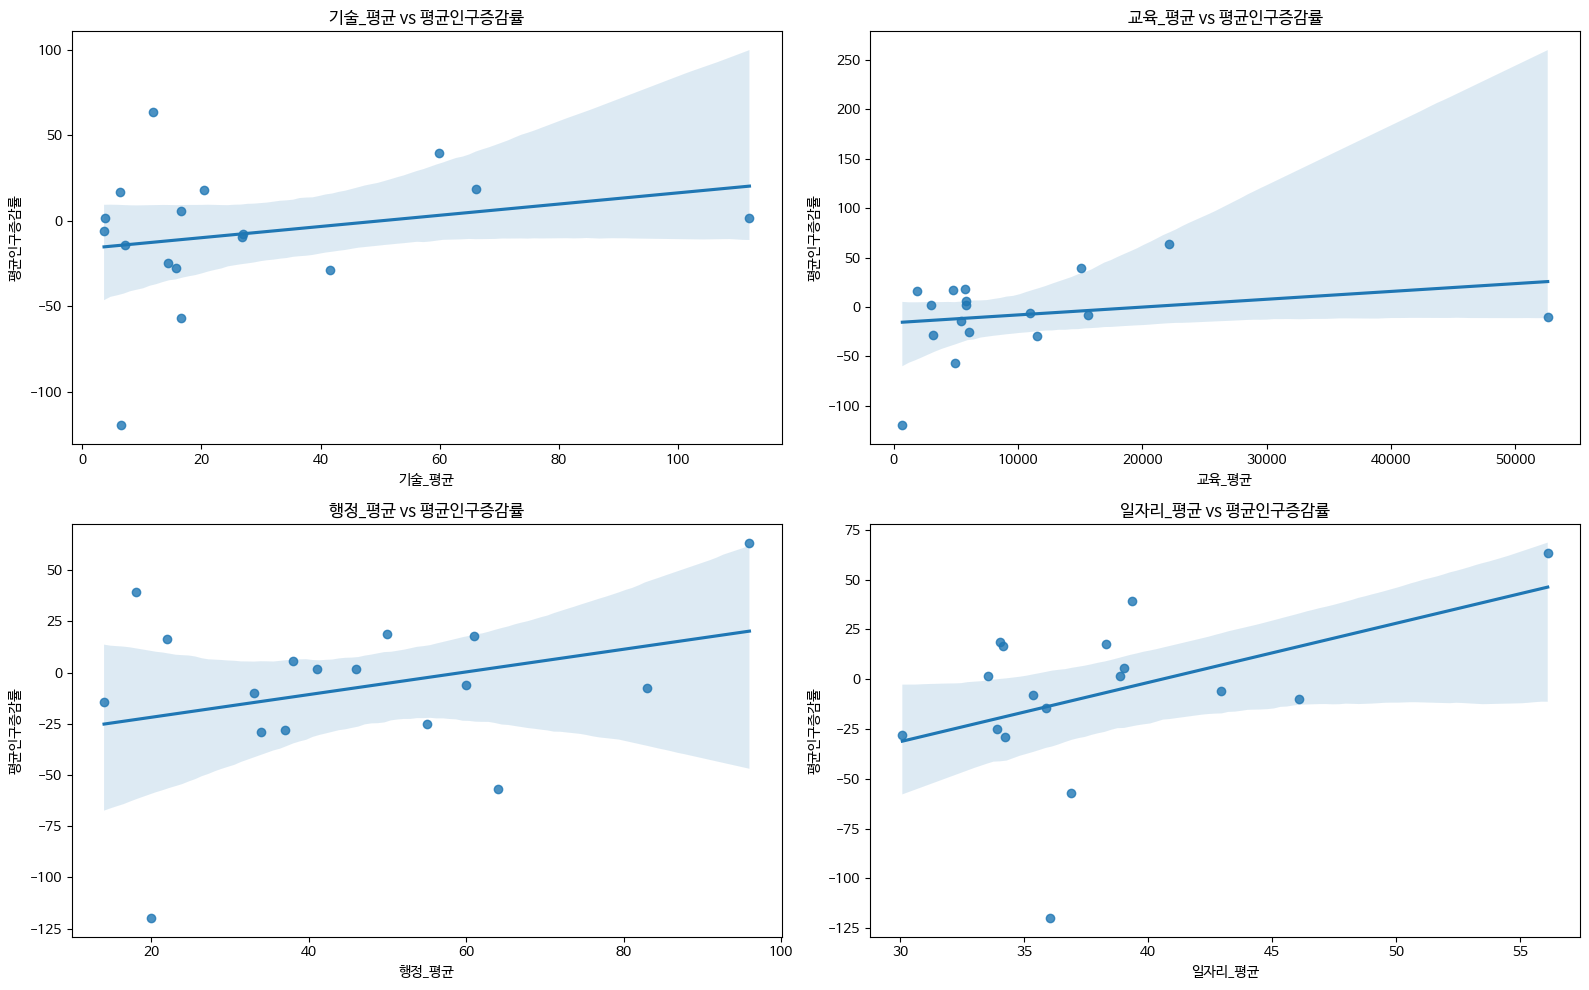

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# df_sub 에서 평균 컬럼들 미리 만들어주기
df_sub["기술_평균"] = df_sub[[
    "디지털_기술_빅데이터",
    "디지털_기술_인공지능",
    "디지털_기술_IoT",
    "디지털_기술_블록체인",
    "디지털_기술_클라우드",
    "디지털_기술_XR"
]].mean(axis=1)

df_sub["교육_평균"] = df_sub[[
    "디지털_교육_학과수",
    "디지털_교육_재적생수"
]].mean(axis=1)

df_sub["행정_평균"] = df_sub[["디지털_행정기관_지원"]].mean(axis=1)

df_sub["일자리_평균"] = df_sub[[
    "디지털_일자리_창업기관",
    "디지털_일자리_고용률"
]].mean(axis=1)

plot_cols = ["기술_평균", "교육_평균", "행정_평균", "일자리_평균"]

plt.figure(figsize=(16, 10))

for i, col in enumerate(plot_cols):
    plt.subplot(2, 2, i+1)
    sns.regplot(x=df_sub[col], y=df_sub["평균인구증감률"])
    plt.title(f"{col} vs 평균인구증감률")
    plt.xlabel(col)
    plt.ylabel("평균인구증감률")

plt.tight_layout()
plt.show()

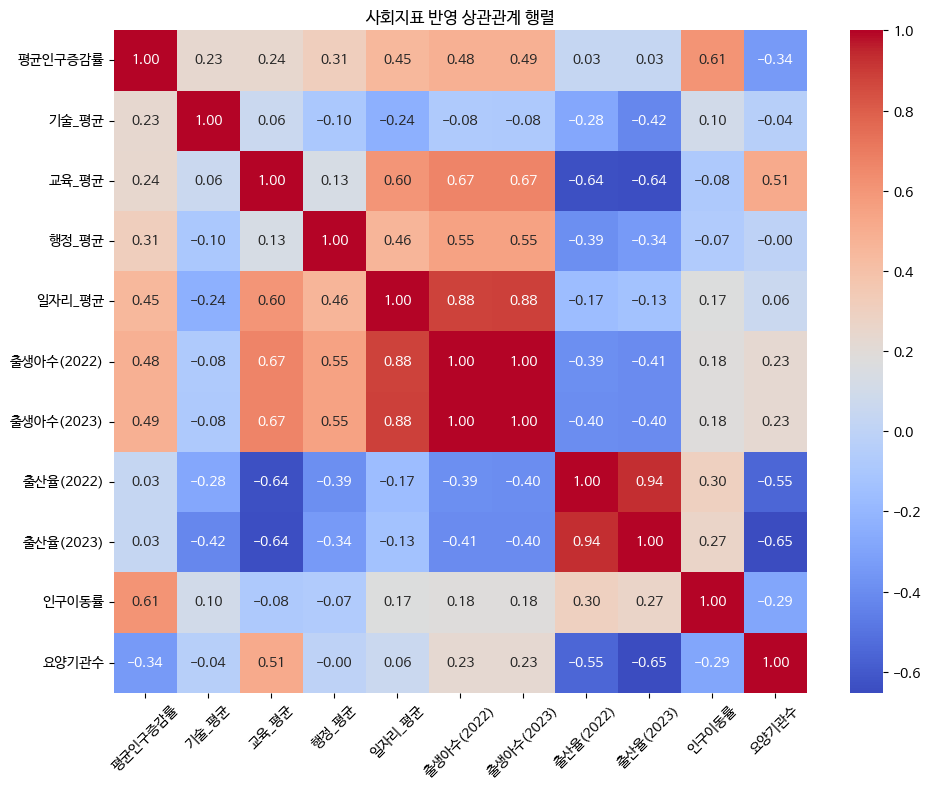

In [ ]:

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("사회지표 반영 상관관계 행렬")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 요약표
summary_df = df_sub[["지역명", "평균인구증감률", "기술_평균", "교육_평균", "행정_평균", "일자리_평균"] + social_cols]
print(summary_df)

   지역명     평균인구증감률       기술_평균    교육_평균  행정_평균  일자리_평균  출생아수(2022)  \
0   서울   -9.877373   26.843750  52598.5   33.0   46.10     42602.0   
1   부산   -7.731048   27.000000  15642.0   83.0   35.35     14134.0   
2   대구  -25.026694   14.333333   6047.5   55.0   33.90     10134.0   
3   인천   18.662961   66.166667   5762.5   50.0   34.05     14464.0   
4   광주    1.703309  112.000000   5847.5   41.0   33.55      7446.0   
5   대전  -29.132084   41.666667  11543.5   34.0   34.25      7677.0   
6   울산  -27.891698   15.666667   3173.0   37.0   30.10      5399.0   
7   세종   16.564271    6.333333   1885.0   22.0   34.15      3209.0   
8   경기   63.442736   11.833333  22164.5   96.0   56.10     75323.0   
9   강원  -14.317954    7.166667   5400.5   14.0   35.90      7278.0   
10  충북    5.658188   16.500000   5823.0   38.0   39.05      7452.0   
11  충남   39.250533   59.833333  15081.0   18.0   39.35     10221.0   
12  전북  -56.951531   16.500000   4906.0   64.0   36.90      7032.0   
13  전남    1.732276  

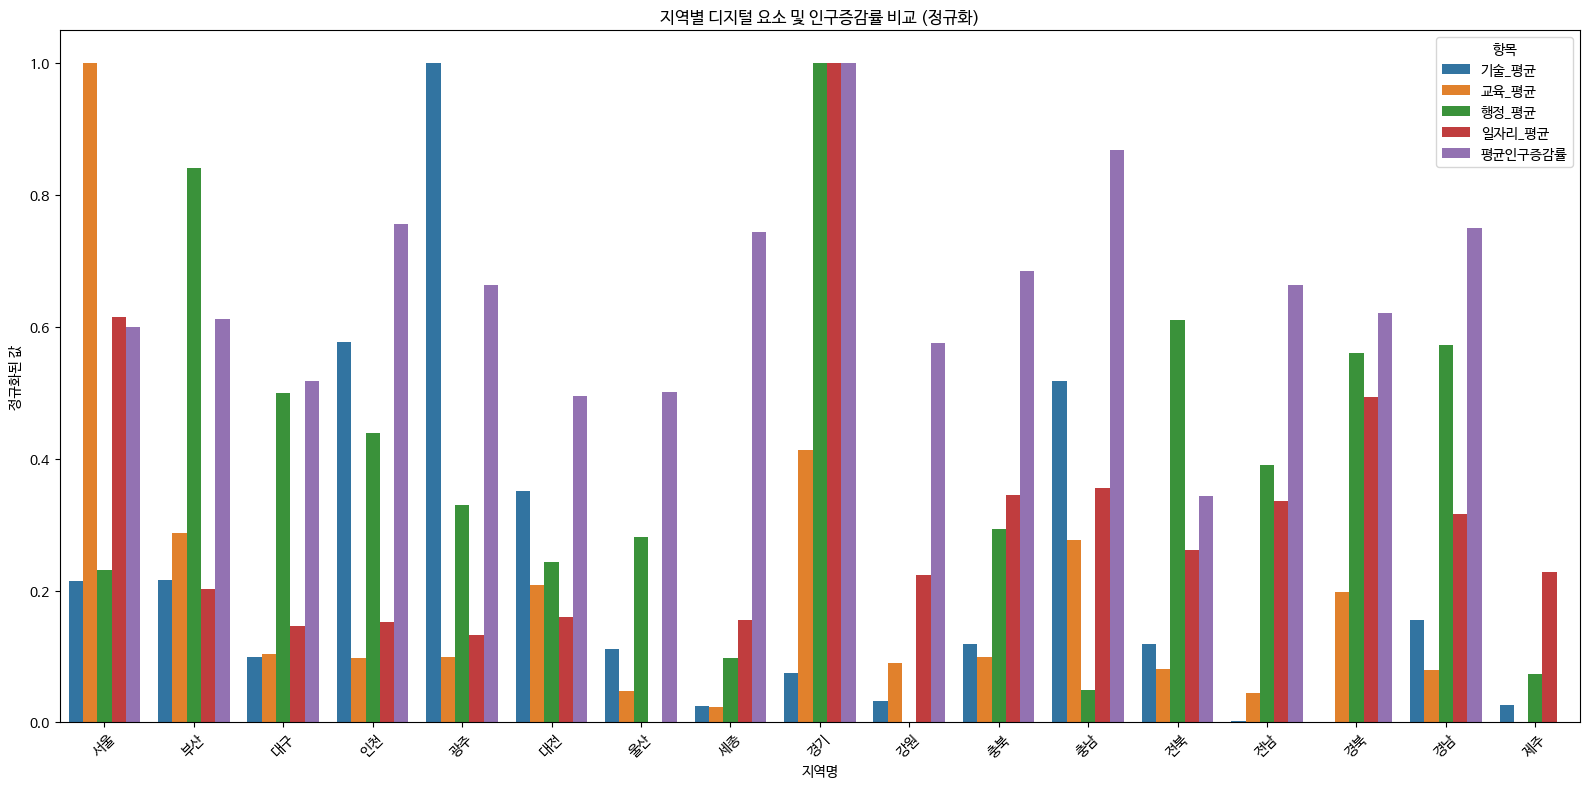

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 비교할 항목들
plot_cols = ["기술_평균", "교육_평균", "행정_평균", "일자리_평균", "평균인구증감률"]

# 시각화를 위해 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df_sub.copy()
df_normalized[plot_cols] = scaler.fit_transform(df_normalized[plot_cols])

# melt를 사용해서 데이터 구조 변환 (long format)
df_melted = df_normalized.melt(id_vars=["지역명"], value_vars=plot_cols,
                               var_name="항목", value_name="정규화된 값")

# 시각화
plt.figure(figsize=(16, 8))
sns.barplot(data=df_melted, x="지역명", y="정규화된 값", hue="항목")
plt.title("지역별 디지털 요소 및 인구증감률 비교 (정규화)")
plt.xticks(rotation=45)
plt.legend(title="항목")
plt.tight_layout()
plt.show()


In [ ]:

import pandas as pd
from io import StringIO
import statsmodels.api as sm

csv_text = """
지역,문화시설_축제_2022,문화시설_축제_2023,문화기반_2022,문화기반_2023,출생아수_2022,출산율_2022,출생아수_2023,출산율_2023,인구이동률,요양기관수,평균인구증감률
서울,150,210,372,380,42602,0.593,39456,0.552,-0.48,264,-9.877372694
부산,96,163,91,92,14134,0.723,12866,0.664,-0.42,104,-7.731047677
대구,53,111,65,65,10134,0.757,9410,0.702,-0.2,240,-25.02669421
인천,77,146,93,93,14464,0.747,13659,0.694,0.86,109,18.66296082
광주,31,54,50,54,7446,0.844,6172,0.706,-0.56,95,1.703309166
대전,34,58,46,45,7677,0.842,7194,0.787,-0.12,127,-29.13208362
울산,45,85,31,31,5399,0.848,5082,0.814,-0.44,54,-27.89169762
세종,32,52,20,22,3209,1.121,2761,0.971,0.72,105,16.56427147
경기,364,401,487,497,75323,0.839,68817,0.766,0.47,90,63.44273601
강원,166,184,179,182,7278,0.968,6688,0.893,-0.17,76,-14.31795386
충북,73,79,108,107,7452,0.871,7580,0.886,0.2,16,5.658188246
충남,163,158,137,135,10221,0.909,9436,0.842,0.69,44,39.25053306
전북,136,150,128,129,7032,0.817,6622,0.78,-0.35,104,-56.95153061
전남,187,191,174,176,7888,0.969,7828,0.972,-0.22,62,1.732275893
경북,202,210,156,159,11311,0.93,10186,0.86,-0.32,71,-6.093213743
경남,209,238,164,167,14017,0.838,13049,0.799,-0.28,94,17.63941178
제주,44,82,105,105,3599,0.919,3222,0.827,-0.5,160,-119.8173006
"""

# 1. 데이터 불러오기
df = pd.read_csv(StringIO(csv_text)).set_index("지역")

# 2. 회귀 모델에 사용할 변수 선택 (문화 변수 + 사회구조 변수)
# 문화 변수 예: '문화시설_축제_2022', '문화시설_축제_2023', '문화기반_2022', '문화기반_2023'
# 사회구조 변수 예: '출생아수_2022', '출산율_2022', '출생아수_2023', '출산율_2023', '요양기관수'

features = [
    "문화시설_축제_2022", "문화시설_축제_2023", "문화기반_2022", "문화기반_2023",
    "출생아수_2022", "출산율_2022", "출생아수_2023", "출산율_2023",
    "요양기관수"
]

X = df[features]
y = df["평균인구증감률"]

# 3. 회귀분석 (상수항 추가)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 4. 예측 인구증감률 (문화+사회구조 반영된 값)
df["예측_인구증감률"] = model.predict(X)

# 5. 기존 함수 수정 없이 예측 인구증감률 기반으로 전략 분류
def classify_culture_strategy(row):
    rate = row["예측_인구증감률"]

    if rate >= 30:
        return pd.Series({
            "문화전략기여도": "높음",
            "문화전략평가": "강점",
            "전략방향": "우수지역 -> 강점 유지 및 확대",
            "우선순위": "핵심 유지/확대"
        })
    elif 0 <= rate < 30:
        return pd.Series({
            "문화전략기여도": "중간이상",
            "문화전략평가": "중간 또는 보통",
            "전략방향": "문화시설 인프라 확충 및 지역축제 보완",
            "우선순위": "유지/보완 전략"
        })
    elif -10 < rate < 0:
        return pd.Series({
            "문화전략기여도": "낮음",
            "문화전략평가": "약점",
            "전략방향": "문화시설 보완 및 지역축제 보완",
            "우선순위": "보완 전략"
        })
    elif -30 < rate <= -10:
        return pd.Series({
            "문화전략기여도": "낮음",
            "문화전략평가": "약점",
            "전략방향": "문화시설 및 지역축제 인프라 확충",
            "우선순위": "중점 투자"
        })
    else:  # -30 이하
        return pd.Series({
            "문화전략기여도": "매우 낮음",
            "문화전략평가": "심각한 약점",
            "전략방향": "관광 연계 축제 및 시설 강화 필요",
            "우선순위": "중점 투자"
        })

df_strategy = df.join(df.apply(classify_culture_strategy, axis=1))

print(df_strategy[["예측_인구증감률", "문화전략기여도", "문화전략평가", "전략방향", "우선순위"]])


     예측_인구증감률 문화전략기여도    문화전략평가                   전략방향      우선순위
지역                                                              
서울 -16.675860      낮음        약점     문화시설 및 지역축제 인프라 확충     중점 투자
부산 -20.469399      낮음        약점     문화시설 및 지역축제 인프라 확충     중점 투자
대구 -49.716553   매우 낮음    심각한 약점    관광 연계 축제 및 시설 강화 필요     중점 투자
인천  30.146400      높음        강점     우수지역 -> 강점 유지 및 확대  핵심 유지/확대
광주  -8.051093      낮음        약점      문화시설 보완 및 지역축제 보완     보완 전략
대전 -16.694879      낮음        약점     문화시설 및 지역축제 인프라 확충     중점 투자
울산 -28.025784      낮음        약점     문화시설 및 지역축제 인프라 확충     중점 투자
세종  18.078337    중간이상  중간 또는 보통  문화시설 인프라 확충 및 지역축제 보완  유지/보완 전략
경기  69.510986      높음        강점     우수지역 -> 강점 유지 및 확대  핵심 유지/확대
강원 -32.572718   매우 낮음    심각한 약점    관광 연계 축제 및 시설 강화 필요     중점 투자
충북   0.033376    중간이상  중간 또는 보통  문화시설 인프라 확충 및 지역축제 보완  유지/보완 전략
충남  16.544873    중간이상  중간 또는 보통  문화시설 인프라 확충 및 지역축제 보완  유지/보완 전략
전북 -12.894487      낮음        약점     문화시설 및 지역축제 인프라 확충     중점 투자
전남 -11.491120      낮음    

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# (이전 데이터 전처리 및 df_sub 생성은 동일하다고 가정)

# 인덱스 중복 및 행 중복 확인 (추가)
print("중복 인덱스 개수:", df_sub.index.duplicated().sum())
print("중복 행 개수:", df_sub.duplicated().sum())

df_sub.rename(columns={"평균인구증감률": "인구증감률"}, inplace=True)
df_sub['인구증감률'] = df_sub[["기술_평균", "교육_평균", "행정_평균", "일자리_평균"] + social_cols].mean(axis=1)

factor_cols = ["기술_평균", "교육_평균", "행정_평균", "일자리_평균"]

scaler = StandardScaler()
scaled = scaler.fit_transform(df_sub[factor_cols])

df_scaled = pd.DataFrame(scaled, columns=factor_cols, index=df_sub.index)

df_sub['강한 요소'] = df_scaled[factor_cols].idxmax(axis=1)
df_sub['약한 요소'] = df_scaled[factor_cols].idxmin(axis=1)


def assign_strategy(row):
    strong = row['강한 요소']
    weak = row['약한 요소']
    pop_change = row['인구증감률']

    strategy_map = {
        '기술_평균': '기술분야 강화',
        '교육_평균': '교육분야 강화',
        '행정_평균': '행정부 지원 분야 강화',
        '일자리_평균': '일자리 창출 분야 강화'
    }

    if pop_change >= 5000:
        priority = '보완전략'      # 이미 많이 성장한 지역
    elif 2500 <= pop_change < 5000:
        priority = '균형유지'     # 중간 규모 성장
    else:
        priority = '중점투자'

    strategy = f"‘{strategy_map.get(strong)}’ 유지 및 ‘{strategy_map.get(weak)}’ 보완 전략"
    return pd.Series([strategy, priority])

df_sub[['전략', '우선순위']] = df_sub.apply(assign_strategy, axis=1)

# 중복 행 제거 (만약 중복 있다면)
df_sub = df_sub.drop_duplicates(subset=['지역명'], keep='first')

# 강한 요소, 약한 요소 이름 매핑
name_map = {
    "기술_평균": "기술",
    "교육_평균": "교육",
    "행정_평균": "행정부 지원",
    "일자리_평균": "일자리 창출"
}
result = df_sub.reset_index()[["지역명", "인구증감률", "강한 요소", "약한 요소", "전략", "우선순위"]]
result['강한 요소'] = result['강한 요소'].map(name_map)
result['약한 요소'] = result['약한 요소'].map(name_map)

print(result)


중복 인덱스 개수: 0
중복 행 개수: 0
   지역명         인구증감률   강한 요소   약한 요소  \
0   서울  13502.710875      교육  행정부 지원   
1   부산   4289.231700  행정부 지원  일자리 창출   
2   대구   2593.599233  행정부 지원  일자리 창출   
3   인천   3414.701767      기술  일자리 창출   
4   광주   1974.804000      기술  일자리 창출   
5   대전   2665.292567      기술  일자리 창출   
6   울산   1379.198867  행정부 지원  일자리 창출   
7   세종    802.529533  일자리 창출  행정부 지원   
8   경기  16656.050833  일자리 창출      기술   
9   강원   1950.125767  일자리 창출  행정부 지원   
10  충북   2096.650700  일자리 창출      교육   
11  충남   3490.162433      기술  행정부 지원   
12  전북   1878.264700  행정부 지원      교육   
13  전남   1889.890433  일자리 창출      기술   
14  경북   3265.608667  일자리 창출      기술   
15  경남   3208.015700  행정부 지원      교육   
16  제주    774.179600  일자리 창출  행정부 지원   

                                          전략  우선순위  
0        ‘교육분야 강화’ 유지 및 ‘행정부 지원 분야 강화’ 보완 전략  보완전략  
1   ‘행정부 지원 분야 강화’ 유지 및 ‘일자리 창출 분야 강화’ 보완 전략  균형유지  
2   ‘행정부 지원 분야 강화’ 유지 및 ‘일자리 창출 분야 강화’ 보완 전략  균형유지  
3        ‘기술분야 강화’ 유지 및 ‘일자리 창출 분야 강화’ 보완 전

In [ ]:
def custom_strategy(row):
    strong = row['강한 요소']
    weak = row['약한 요소']
    priority = row['우선순위']

    if priority == '중점투자':
        return f"{strong} 분야는 강화 및 확대하고, {weak} 분야는 보완이 필요함"
    elif priority == '보완전략':
        return f"{strong} 분야는 유지하고, {weak} 분야는 보완이 필요함"
    elif priority == '균형유지':
        return f"{strong} 분야와 {weak} 분야 모두 균형 있게 유지함"
    else:
        return f"{strong} 분야는 유지하고, {weak} 분야는 보완이 필요함"

df_sub['전략'] = df_sub.apply(custom_strategy, axis=1)

print(df_sub)



   지역명         인구증감률  디지털_기술_빅데이터  디지털_기술_인공지능  디지털_기술_IoT  디지털_기술_블록체인  \
0   서울  13502.710875      33.8125      18.4375     20.5625          6.0   
1   부산   4289.231700      32.0000      10.0000     14.0000          1.0   
2   대구   2593.599233      12.0000      18.0000      8.0000          8.0   
3   인천   3414.701767      50.0000      28.0000     48.0000          1.0   
4   광주   1974.804000     164.0000      46.0000    137.0000         49.0   
5   대전   2665.292567      99.0000      44.0000     27.0000          1.0   
6   울산   1379.198867      10.0000       6.0000      2.0000          1.0   
7   세종    802.529533       8.0000      18.0000      1.0000          4.0   
8   경기  16656.050833      16.0000      13.0000     13.0000          0.0   
9   강원   1950.125767      10.0000       8.0000      6.0000          0.0   
10  충북   2096.650700       6.0000      10.0000     15.0000          8.0   
11  충남   3490.162433      88.0000      72.0000     30.0000         18.0   
12  전북   1878.264700     